## CHURN PREDICTION:

### Import the required libraries

In [74]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import sklearn
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats
import re
from sklearn.metrics import classification_report

### Load the Data set

In [2]:
df = pd.read_csv("C:\\Users\\lenovo\\Downloads\\churn.csv")


In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.shape

(7043, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Data Cleaning

In [10]:
df.drop(columns ='customerID',inplace=True,axis=1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [12]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


In [13]:
df['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [14]:
np.unique(df.TotalCharges.values)

array([' ', '100.2', '100.25', ..., '999.45', '999.8', '999.9'],
      dtype=object)

In [15]:
df=df.replace(to_replace=" ",value=np.nan)

In [16]:
df.TotalCharges=pd.to_numeric(df.TotalCharges) 

In [17]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [18]:
np.unique(df.TotalCharges.values)

array([  18.8 ,   18.85,   18.9 , ..., 8672.45, 8684.8 ,     nan])

In [19]:
df = df.dropna()
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


### Exploratory Data Analysis

### Univariate Analysis:

In [20]:
from ipywidgets import interact, interact_manual

In [21]:
@interact_manual
def barplot(col = df.select_dtypes('object'),
           col1 = df.select_dtypes('number')):
    sns.boxplot(df[col],df[col1],hue = df['Partner']);

interactive(children=(Dropdown(description='col', options=('gender', 'Partner', 'Dependents', 'PhoneService', …

<AxesSubplot:title={'center':'Number of monthly charges'}, xlabel='tenure', ylabel='count'>

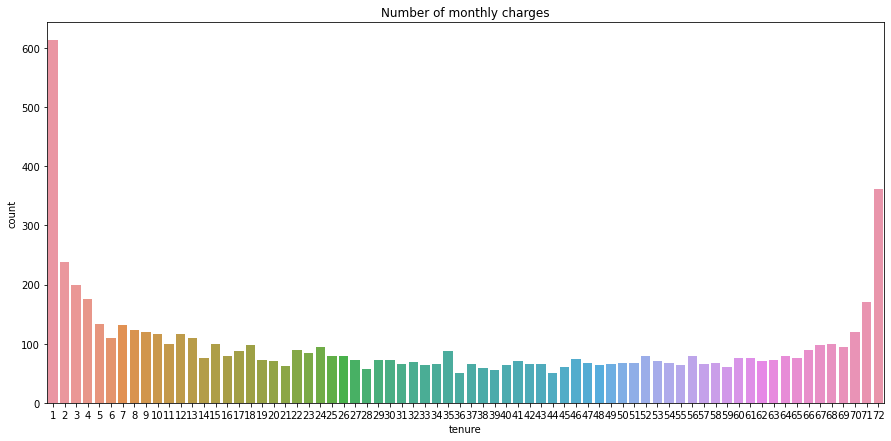

In [22]:
plt.figure(figsize=(15,7))
plt.title('Number of monthly charges')
sns.countplot(x='tenure', data=df)

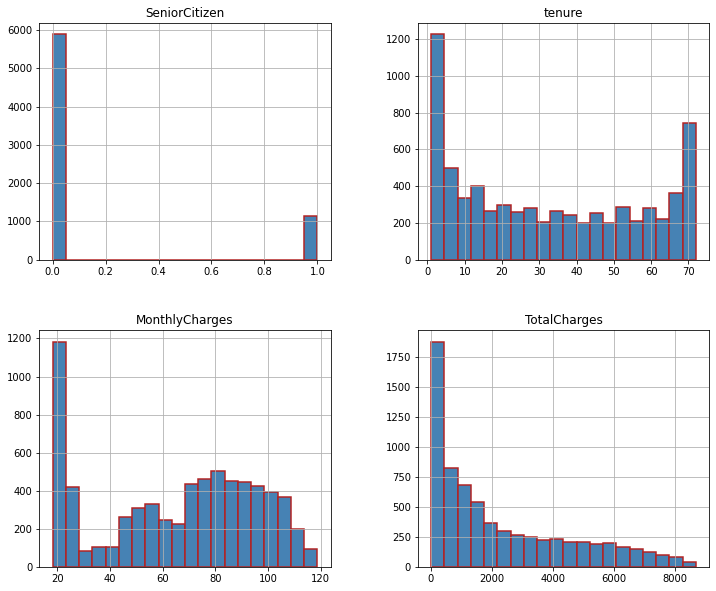

In [23]:
df.hist(figsize=(12, 10),
                          bins=20,
                          layout=(2, 2),
                          color='steelblue',
                          edgecolor='firebrick',
                          linewidth=1.5);



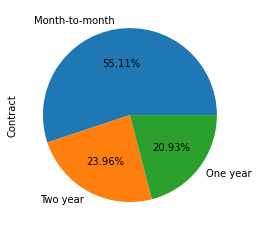

In [24]:
df["Contract"].value_counts().plot.pie(autopct="%.2f%%");

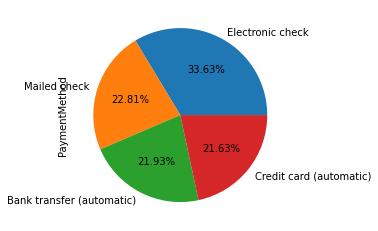

In [25]:
df["PaymentMethod"].value_counts().plot.pie(autopct="%.2f%%");

<AxesSubplot:title={'center':'Number of TotalCharges charges'}, xlabel='tenure', ylabel='count'>

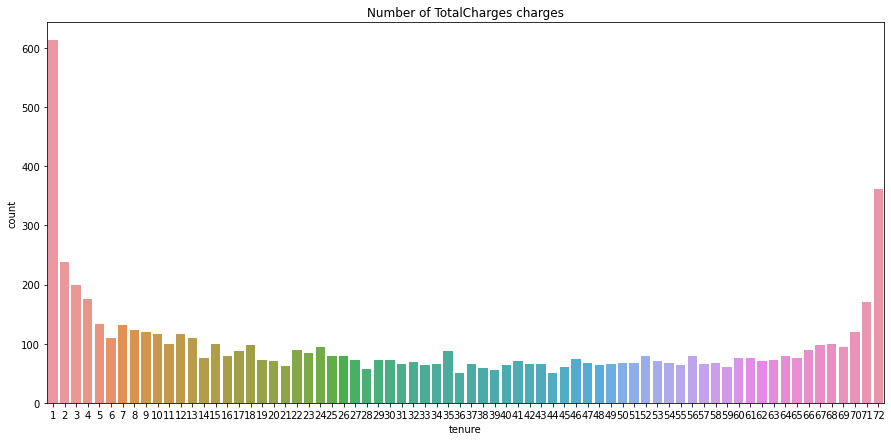

In [26]:
plt.figure(figsize=(15,7))
plt.title('Number of TotalCharges charges')
sns.countplot(x='tenure', data=df)

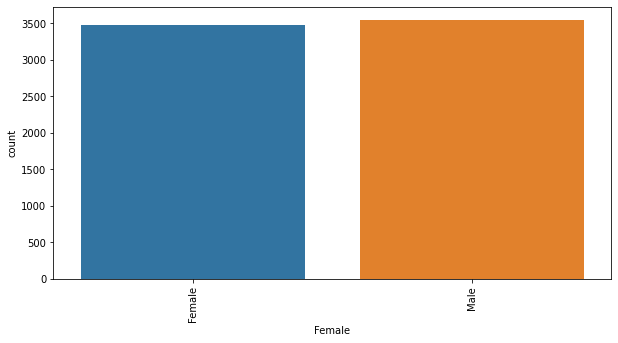

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(x='gender',data=df)
plt.xlabel('Female')
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:xlabel='tenure', ylabel='Density'>

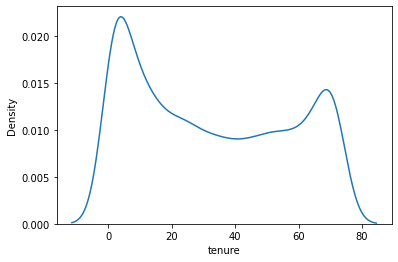

In [28]:
sns.kdeplot(df['tenure'])

<AxesSubplot:xlabel='Churn', ylabel='count'>

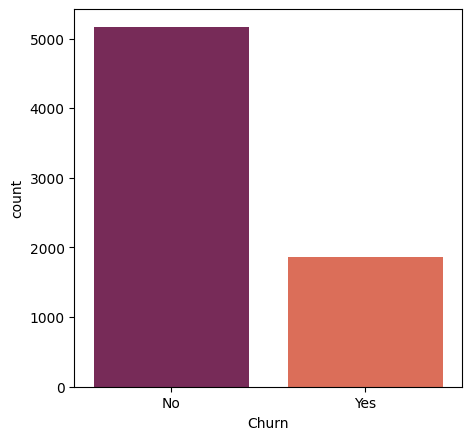

In [29]:
plt.figure(figsize=(5,5),dpi=100)
sns.countplot(data=df,x='Churn',palette='rocket')

In [30]:
num_data=df.select_dtypes(include=["int","float"])
cat_data=df[['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod']]

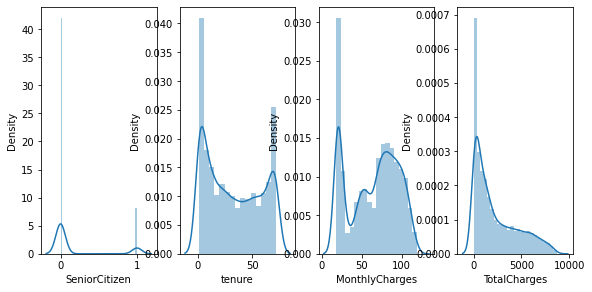

In [31]:
plt.figure(figsize=(17,10))
for i,j in enumerate(num_data.columns):
    plt.subplot(2,7,i+1)
    sns.distplot(num_data[j], kde = True);

### Bivariate Analysis:

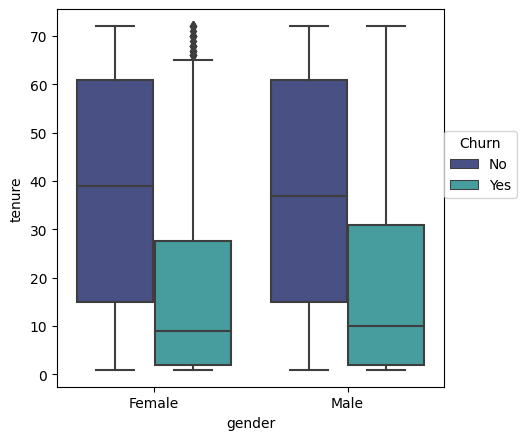

In [32]:
plt.figure(figsize=(5,5),dpi=100)
sns.boxplot(data=df,x='gender',y='tenure',hue='Churn',palette='mako')
plt.legend(loc=(1,0.5),title = "Churn")

<AxesSubplot:xlabel='Contract', ylabel='count'>

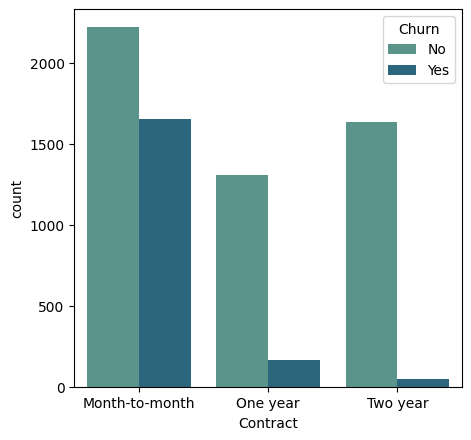

In [33]:
plt.figure(figsize=(5,5),dpi=100)
sns.countplot(data=df,x='Contract',hue='Churn',palette='crest')

In [34]:
df["MonthlyCharges"].corr(df["TotalCharges"])

0.6510648032262025

In [35]:
crosstab = pd.crosstab(df['gender'], df['Contract'])
crosstab

Contract,Month-to-month,One year,Two year
gender,,,
Female,1925,718,840
Male,1950,754,845


<AxesSubplot:xlabel='gender'>

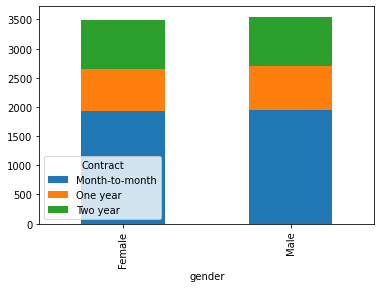

In [36]:
crosstab.plot(kind="bar", 
                 stacked=True)

<AxesSubplot:xlabel='TotalCharges', ylabel='PaymentMethod'>

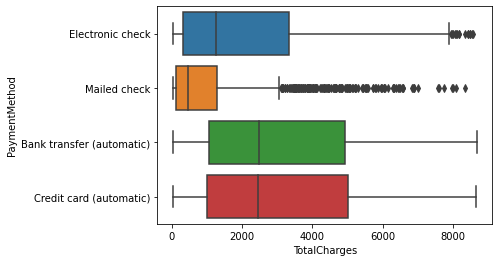

In [37]:
sns.boxplot(x="TotalCharges", y="PaymentMethod", data=df)

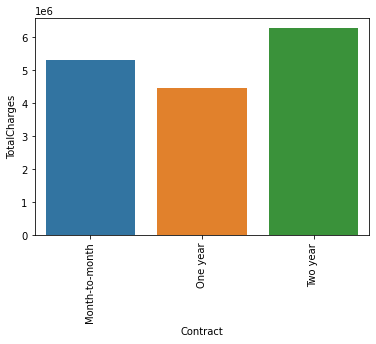

In [38]:
sns.barplot(x='Contract', y='TotalCharges', data=df,ci=None,estimator=sum)
plt.xticks(rotation = 90)
plt.show()

### Multivariate Analysis:

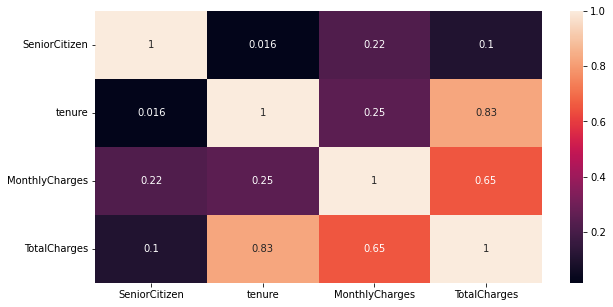

In [39]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

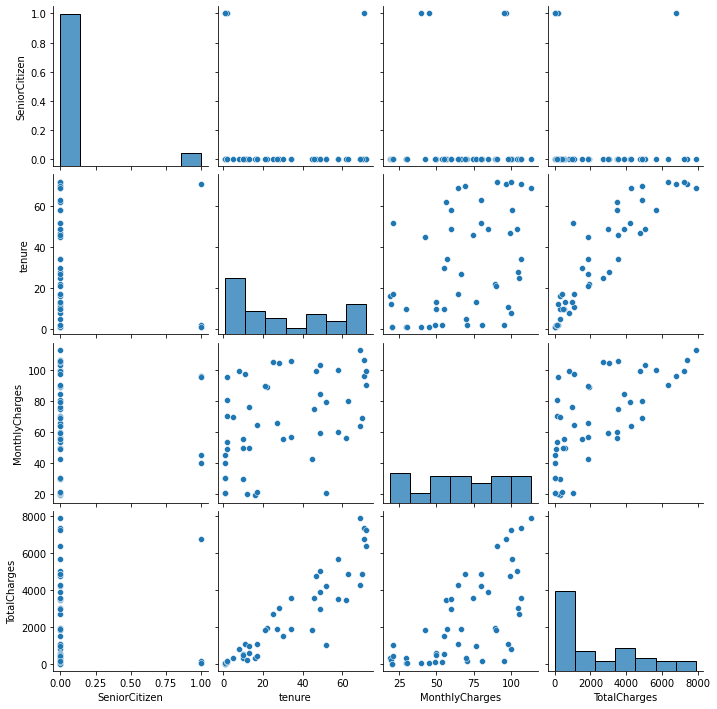

In [40]:
sns.pairplot(df[0:50])
plt.show()

### Task - Machine Learning

Given various features about a customer like Gender, SeniorCitizen, Partner, Dependents etc.. , predict if the customer will churn or not.



### Data trance form:

### a . Identifying the Target variable and Splitting into train and test.

In [41]:
y = df['Churn']

X = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges']]

In [42]:
# Split into train and test:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=100)
X_train.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5523,Female,0,Yes,No,7,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),69.20,477.55
1676,Female,0,No,No,4,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,80.15,319.85
511,Male,0,No,No,61,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,106.45,6300.15
1595,Male,1,No,No,2,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,74.70,165.40
3329,Female,0,Yes,No,18,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Mailed check,50.30,908.75


In [43]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5274, 19) (5274,)
(1758, 19) (1758,)


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


###  b .Separating Numerical & Categorical columns

In [45]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5523,Female,0,Yes,No,7,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),69.20,477.55
1676,Female,0,No,No,4,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,80.15,319.85
511,Male,0,No,No,61,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,106.45,6300.15
1595,Male,1,No,No,2,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,74.70,165.40
3329,Female,0,Yes,No,18,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Mailed check,50.30,908.75


In [46]:
X_train.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [47]:
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
5523,Female,Yes,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic)
1676,Female,No,No,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check
511,Male,No,No,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
1595,Male,No,No,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
3329,Female,Yes,No,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Mailed check


In [48]:
# Numerical Columns
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])
X_train_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
5523,0,7,69.20,477.55
1676,0,4,80.15,319.85
511,0,61,106.45,6300.15
1595,1,2,74.70,165.40
3329,0,18,50.30,908.75


###  c.One Hot Encoding on Categorical Nominal Columns

In [49]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat), 
                               columns=encoder.get_feature_names(X_train_cat.columns), 
                               index = X_train_cat.index)
X_train_cat_ohe.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5523,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1676,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
511,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1595,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3329,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### Scaling the Numerical Values


In [50]:
X_train_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
5523,0,7,69.20,477.55
1676,0,4,80.15,319.85
511,0,61,106.45,6300.15
1595,1,2,74.70,165.40
3329,0,18,50.30,908.75


In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)
X_train_num_rescaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
5523,-0.438945,-1.035648,0.151080,-0.795902
1676,-0.438945,-1.157923,0.514997,-0.865409
511,-0.438945,1.165295,1.389062,1.770434
1595,2.278188,-1.239439,0.333869,-0.933484
3329,-0.438945,-0.587308,-0.477051,-0.605849


In [52]:
X_train_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5274 entries, 5523 to 5649
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender_Male                            5274 non-null   float64
 1   Partner_Yes                            5274 non-null   float64
 2   Dependents_Yes                         5274 non-null   float64
 3   PhoneService_Yes                       5274 non-null   float64
 4   MultipleLines_No phone service         5274 non-null   float64
 5   MultipleLines_Yes                      5274 non-null   float64
 6   InternetService_Fiber optic            5274 non-null   float64
 7   InternetService_No                     5274 non-null   float64
 8   OnlineSecurity_No internet service     5274 non-null   float64
 9   OnlineSecurity_Yes                     5274 non-null   float64
 10  OnlineBackup_No internet service       5274 non-null   float64
 11  O

### d. Encoding Ordinal Columns

In [53]:
X_train_cat_le = pd.DataFrame(index=X_train_cat.index)
X_train_cat_le.head()

""
5523
1676
511
1595
3329


In [54]:
X_train_cat.Contract.unique()

array(['Month-to-month', 'Two year', 'One year'], dtype=object)

In [55]:
Contract_encoder = {'Month-to-month' : 1, 'One year' : 2, 'Two year' : 3}
X_train_cat_le['Contract'] = X_train_cat['Contract'].apply(lambda x :Contract_encoder[x])
X_train_cat_le


,Contract
5523,1
1676,1
511,1
1595,1
3329,1
...,...
79,2
3934,2
5964,1
6947,2


In [56]:
X_train_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
5523,0,7,69.20,477.55
1676,0,4,80.15,319.85
511,0,61,106.45,6300.15
1595,1,2,74.70,165.40
3329,0,18,50.30,908.75


### e. Concatinating the Encoded Categorical Features and Scaled Numerical Features

In [57]:
X_train_transformed = pd.concat([X_train_num_rescaled,X_train_cat_ohe,X_train_cat_le], axis=1)
X_train_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract
5523,-0.438945,-1.035648,0.151080,-0.795902,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
1676,-0.438945,-1.157923,0.514997,-0.865409,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
511,-0.438945,1.165295,1.389062,1.770434,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
1595,2.278188,-1.239439,0.333869,-0.933484,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
3329,-0.438945,-0.587308,-0.477051,-0.605849,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1


In [58]:
X_train_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5274 entries, 5523 to 5649
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          5274 non-null   float64
 1   tenure                                 5274 non-null   float64
 2   MonthlyCharges                         5274 non-null   float64
 3   TotalCharges                           5274 non-null   float64
 4   gender_Male                            5274 non-null   float64
 5   Partner_Yes                            5274 non-null   float64
 6   Dependents_Yes                         5274 non-null   float64
 7   PhoneService_Yes                       5274 non-null   float64
 8   MultipleLines_No phone service         5274 non-null   float64
 9   MultipleLines_Yes                      5274 non-null   float64
 10  InternetService_Fiber optic            5274 non-null   float64
 11  I

### f. Preparing test data

In [59]:
X_test.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
942,Male,0,No,No,24,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),79.85,2001.00
3730,Female,0,Yes,No,57,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),104.50,5921.35
1761,Male,0,No,No,58,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),24.45,1513.60
2283,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,71.55,71.55
1872,Female,0,Yes,Yes,41,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.70,804.25


In [60]:
X_test.dtypes


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [61]:
#CATEGORICAL COLUMNS
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_cat
X_test_cat.head()


,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
942,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic)
3730,Female,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic)
1761,Male,No,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic)
2283,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check
1872,Female,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)


In [62]:
#NUMERICAL COLUMNS
X_test_num = X_test.select_dtypes(include=['int64','float64'])
X_test_num.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
942,0,24,79.85,2001.00
3730,0,57,104.50,5921.35
1761,0,58,24.45,1513.60
2283,0,1,71.55,71.55
1872,0,41,19.70,804.25


### g.One Hot Encoding on Categorical Features

In [63]:
X_test_cat_ohe = pd.DataFrame(encoder.transform(X_test_cat), 
                               columns=encoder.get_feature_names(X_test_cat.columns), 
                               index = X_test_cat.index)
X_test_cat_ohe.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
942,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3730,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1761,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2283,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1872,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


###  h.Scaling Numerical Features

In [64]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                    columns = X_test_num.columns, 
                                    index = X_test_num.index)
X_test_num_rescaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
942,-0.438945,-0.342758,0.505026,-0.124435
3730,-0.438945,1.002262,1.324255,1.603476
1761,-0.438945,1.043021,-1.336161,-0.339259
2283,-0.438945,-1.280197,0.229180,-0.974849
1872,-0.438945,0.350131,-1.494025,-0.651908


### i.Encoding Ordinal Columns

In [65]:
X_test_cat_le = pd.DataFrame(index=X_test_cat.index)
X_test_cat_le.head()


""
942
3730
1761
2283
1872


In [66]:
X_test_cat.Contract.unique()

array(['Month-to-month', 'Two year', 'One year'], dtype=object)

In [67]:
Contract_encoder = {'Month-to-month' : 1, 'One year' : 2, 'Two year' : 3}
X_test_cat_le['Contract'] = X_test_cat['Contract'].apply(lambda x :Contract_encoder[x])
X_test_cat_le



,Contract
942,1
3730,1
1761,3
2283,1
1872,3
...,...
1848,2
5925,2
3603,1
6747,2


### j. Concatinating the Encoded Categorical Features & Scaled Numerical Features

In [68]:
X_test_transformed = pd.concat([X_test_num_rescaled,X_test_cat_ohe,X_test_cat_le], axis=1)
X_test_transformed.head()



,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract
942,-0.438945,-0.342758,0.505026,-0.124435,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1
3730,-0.438945,1.002262,1.324255,1.603476,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1
1761,-0.438945,1.043021,-1.336161,-0.339259,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,3
2283,-0.438945,-1.280197,0.229180,-0.974849,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
1872,-0.438945,0.350131,-1.494025,-0.651908,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3


### Algorithms usage:

#### Logistic Regression

In [76]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0,C=10)  
classifier.fit(X_train_transformed, y_train)

LogisticRegression(C=10, random_state=0)

In [77]:
classifier.score(X_train_transformed, y_train)

0.8098217671596512

In [78]:
y_test_pred = classifier.predict(X_test_transformed) 

In [87]:
from sklearn import metrics

In [88]:
metrics.accuracy_score(y_test, y_test_pred)

0.7610921501706485

In [89]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

          No       0.83      0.84      0.84      1268
         Yes       0.57      0.55      0.56       490

    accuracy                           0.76      1758
   macro avg       0.70      0.70      0.70      1758
weighted avg       0.76      0.76      0.76      1758



### KNN Classifier

In [81]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,weights='uniform',leaf_size=30,p=2,metric='minkowski', metric_params=None, n_jobs=None)
classifier.fit(X_train_transformed, y_train)

KNeighborsClassifier()

In [82]:
classifier.score(X_train_transformed, y_train)

0.8375047402351157

In [83]:
y_test_pred = classifier.predict(X_test_transformed)

In [84]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})


In [85]:
from sklearn import metrics

In [86]:
metrics.accuracy_score(y_test, y_test_pred)

0.7610921501706485

In [ ]:
print(classification_report(y_test, y_test_pred))

### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(X_train_transformed, y_train)  

In [90]:
classifier.score(X_train_transformed, y_train)

0.8375047402351157

In [91]:
y_test_pred = classifier.predict(X_test_transformed)

In [92]:
metrics.accuracy_score(y_test, y_test_pred)

0.7610921501706485

In [93]:

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

          No       0.83      0.84      0.84      1268
         Yes       0.57      0.55      0.56       490

    accuracy                           0.76      1758
   macro avg       0.70      0.70      0.70      1758
weighted avg       0.76      0.76      0.76      1758



### Ensemble Random Forest

In [94]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_transformed, y_train)

RandomForestClassifier()

In [95]:
classifier.score(X_train_transformed, y_train)

0.9973454683352294

In [96]:
y_test_pred = classifier.predict(X_test_transformed)

In [97]:
metrics.accuracy_score(y_test, y_test_pred)

0.782707622298066

In [98]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df

,Actual,Predicted
942,No,No
3730,Yes,No
1761,No,No
2283,Yes,No
1872,No,No
...,...,...
1848,No,No
5925,No,No
3603,Yes,Yes
6747,No,No


In [99]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

          No       0.83      0.88      0.85      1268
         Yes       0.63      0.52      0.57       490

    accuracy                           0.78      1758
   macro avg       0.73      0.70      0.71      1758
weighted avg       0.77      0.78      0.78      1758



### Support Vector Machine

In [100]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(C=10, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, )  
classifier.fit(X_train_transformed, y_train) 

SVC(C=10)

In [101]:
classifier.score(X_train_transformed, y_train)

0.8399696624952597

In [102]:
y_test_pred = classifier.predict(X_test_transformed) 

In [103]:
metrics.accuracy_score(y_test, y_test_pred)

0.78839590443686

In [104]:

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

          No       0.84      0.88      0.86      1268
         Yes       0.64      0.55      0.59       490

    accuracy                           0.79      1758
   macro avg       0.74      0.72      0.72      1758
weighted avg       0.78      0.79      0.78      1758



### Naive Bayes Classifier

In [105]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_transformed,y_train)

GaussianNB()

In [106]:
y_test_pred = gnb.predict(X_test_transformed)

In [107]:
temp_df = pd.DataFrame({'Actual' : y_test,'Predicted' :y_test_pred })
temp_df.head()

,Actual,Predicted
942,No,Yes
3730,Yes,Yes
1761,No,No
2283,Yes,Yes
1872,No,No


In [108]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)


0.6575654152445961

In [109]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

          No       0.91      0.58      0.71      1268
         Yes       0.44      0.85      0.58       490

    accuracy                           0.66      1758
   macro avg       0.67      0.72      0.65      1758
weighted avg       0.78      0.66      0.67      1758

